In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("C:\\Users\\Lavanya N Khushi\\Downloads\\resume_data.csv")
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

In [4]:
df.describe()

,matched_score
count,9544.000000
mean,0.660831
std,0.167040
min,0.000000
25%,0.583333
50%,0.683333
75%,0.793333
max,0.970000


In [5]:
print(df.isnull().sum())

address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels              

Data PreProcessing

In [6]:
# Drop columns with too many missing values (threshold: >70%)
df = df.drop(columns=[
    'address', 'languages', 'proficiency_levels',
    'certification_providers', 'certification_skills', 'online_links',
    'issue_dates', 'expiry_dates'
])

In [7]:
text_cols = [
    'career_objective', 'skills', 'educational_institution_name',
    'degree_names', 'passing_years', 'educational_results',
    'result_types', 'major_field_of_studies', 'professional_company_names',
    'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job',
    'positions', 'locations', 'extra_curricular_activity_types',
    'extra_curricular_organization_names', 'extra_curricular_organization_links',
    'role_positions', 'experiencere_requirement', 'age_requirement',
    'skills_required'
]

for col in text_cols:
    df[col] = df[col].fillna('Unknown')

In [8]:
df['shortlisted'] = df['matched_score'].apply(lambda x: 1 if x >= 0.7 else 0)
df['shortlisted'].value_counts()
df

,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,...,extra_curricular_organization_links,role_positions,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score,shortlisted
0,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],[None],...,Unknown,Unknown,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,Unknown,Technical Support\nTroubleshooting\nCollaborat...,Unknown,0.850000,1
1,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],['N/A'],...,Unknown,Unknown,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),Unknown,Machine Learning Leadership\nCross-Functional ...,Unknown,0.750000,1
2,Unknown,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],['N/A'],...,Unknown,Unknown,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,Unknown,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667,0
3,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...","[None, None, None, None, None, None]",...,Unknown,Unknown,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000,1
4,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...","[None, None, None, None, None]",...,"[None, None, None, None]","[None, None, None, None]",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,Unknown,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Unknown,"['Mathematical modelling', 'Machine Learning',...",['Sanghvi College of Engineering'],['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],['BPM Foundation'],['N/A'],...,Unknown,Unknown,Data Engineer,Bachelor of Science (BSc),5 to 8 years,Unknown,Data Platform Design\nData Pipeline Developmen...,Azure\nBig Data\nData Analytics\nETL Tools\nPo...,0.683333,0
9540,Expertise EDA modeler. I like to learn what my...,"['Data Analysis', 'Business Analysis', 'Machin...","['KVoCT, Pune', 'KVoCT, Pune']","['B.CA', 'M.CA']","['2018', '2020']","[None, None]","[None, None]","[None, None]",['Passionate Solution'],[None],...,Unknown,Unknown,Executive/ Sr. Executive -IT,Bachelor of Science (BSc) in Computer Science ...,3 to 5 years,Age at most 40 years,Hardware & Software Installation\nSystem Monit...,Unknown,0.650000,0
9541,Looking for roles related to application devel...,"['Business Analyst', 'Data Analytics', 'Data C...",['PGG College Mysore'],['B.BA'],['2019'],['N/A'],['N/A'],['N/A'],['ZigSAW'],['N/A'],...,Unknown,Unknown,Exe

Feature Engineering

In [9]:
features = [
    'career_objective', 'skills', 'educational_institution_name',
    'degree_names', 'major_field_of_studies', 'professional_company_names',
    'related_skils_in_job', 'skills_required', 'experiencere_requirement',
    'educationaL_requirements', 'responsibilities.1', 'matched_score'
]

X = df[features]
y = df['shortlisted']
#selecting dependent and independent variables

In [10]:
X = df[features].copy()

X['combined_text'] = X.apply(lambda row: ' '.join(str(val) for val in row.values), axis=1)

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(X['combined_text'])


Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

Model 1: Logistic Regression

In [12]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

In [13]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)

Logistic Regression Accuracy: 0.8748035620743845


In [14]:
print("\n Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1015
           1       0.85      0.89      0.87       894

    accuracy                           0.87      1909
   macro avg       0.87      0.88      0.87      1909
weighted avg       0.88      0.87      0.87      1909



In [15]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

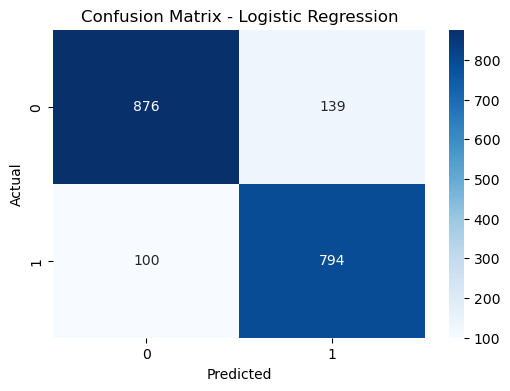

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model 2: Random Forest

In [29]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model on training data
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [30]:
best_rf_model = grid_rf.best_estimator_

# Predict with the best model
y_pred_rf = best_rf_model.predict(X_test)

In [31]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Accuracy:", acc_rf)

Best Random Forest Accuracy: 0.9083289680460974


In [32]:
# Best hyperparameters
print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [33]:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1015
           1       0.89      0.91      0.90       894

    accuracy                           0.91      1909
   macro avg       0.91      0.91      0.91      1909
weighted avg       0.91      0.91      0.91      1909



In [34]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

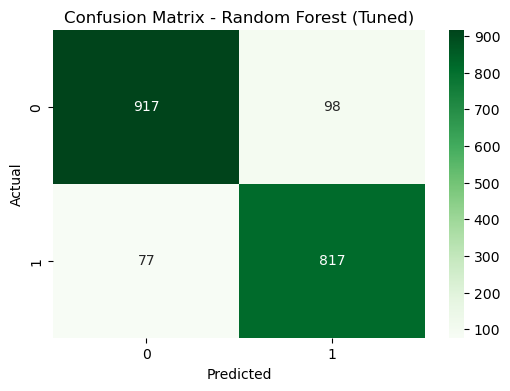

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Model 3: Gradient Boosting

In [36]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

In [37]:
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", acc_gb)

Gradient Boosting Accuracy: 0.9119958093242535


In [38]:
print("\n Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))


 Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1015
           1       0.94      0.86      0.90       894

    accuracy                           0.91      1909
   macro avg       0.92      0.91      0.91      1909
weighted avg       0.91      0.91      0.91      1909



C:\Users\Lavanya N Khushi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


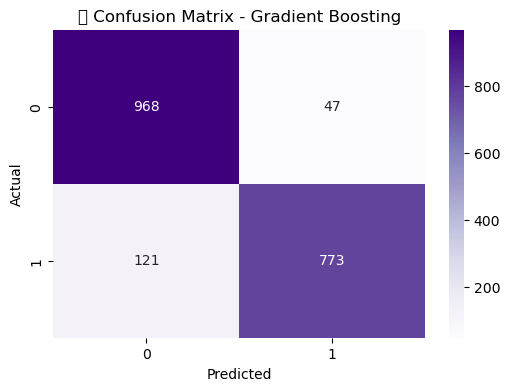

In [39]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Comparison of Model Accuracies

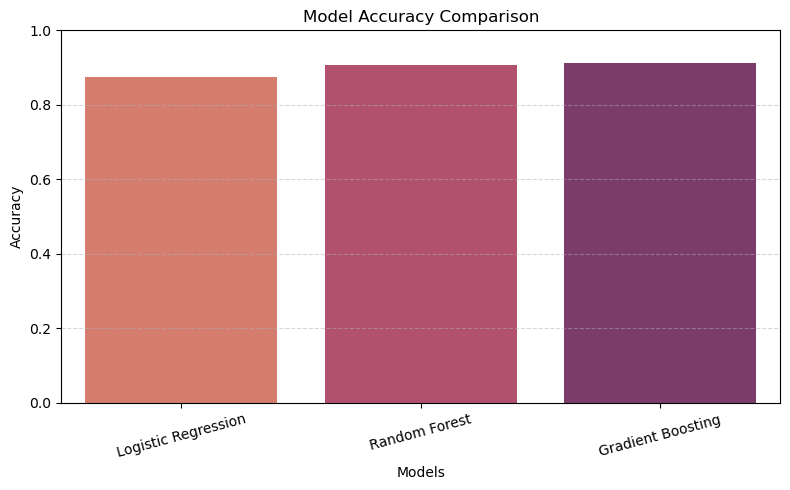

In [28]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [acc_lr, acc_rf, acc_gb]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='flare')
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
